In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("QuadSinHF_NewLongerDriftEvalExp_MSEs_1024NPaths").replace(
            ".", "")

In [19]:
true_paths = np.load(root_dir+extra_path+"_true_paths.npy", allow_pickle=True)[:, :, 0]
score_paths = np.load(root_dir+extra_path+"_score_paths.npy", allow_pickle=True)[:, :, 0]
nad_paths = np.load(root_dir+extra_path+"_nad_paths.npy", allow_pickle=True)[:, :, 0]
ridge_paths = np.load(root_dir+extra_path+"_ridge_paths.npy", allow_pickle=True)[:, :, 0]
hermite_paths = np.load(root_dir+extra_path+"_hermite_paths.npy", allow_pickle=True)[:, :, 0]

true_drifts= np.load(root_dir+extra_path+"_true_drifts.npy", allow_pickle=True)[:, :, 0]
true_drifts_at_score= np.load(root_dir+extra_path+"_true_drifts_at_score.npy", allow_pickle=True)[:, :, 0]
true_drifts_at_nad= np.load(root_dir+extra_path+"_true_drifts_at_nad.npy", allow_pickle=True)[:, :, 0]
true_drifts_at_ridge= np.load(root_dir+extra_path+"_true_drifts_at_ridge.npy", allow_pickle=True)[:, :, 0]
true_drifts_at_hermite= np.load(root_dir+extra_path+"_true_drifts_at_hermite.npy", allow_pickle=True)[:, :, 0]

score_drifts = np.load(root_dir+extra_path+"_score_drifts.npy", allow_pickle=True)[:, :, 0]
nad_drifts = np.load(root_dir+extra_path+"_nad_drifts.npy", allow_pickle=True)[:, :, 0]
ridge_drifts = np.load(root_dir+extra_path+"_ridge_drifts.npy", allow_pickle=True)[:, :, 0]
hermite_drifts = np.load(root_dir+extra_path+"_hermite_drifts.npy", allow_pickle=True)[:, :, 0]

score_drifts_true_law = np.load(root_dir+extra_path+"_score_drifts_true_law.npy", allow_pickle=True)[:, :, 0]
nad_drifts_true_law = np.load(root_dir+extra_path+"_nad_drifts_true_law.npy", allow_pickle=True)[:, :, 0]
ridge_drifts_true_law = np.load(root_dir+extra_path+"_ridge_drifts_true_law.npy", allow_pickle=True)[:, :, 0]
hermite_drifts_true_law = np.load(root_dir+extra_path+"_hermite_drifts_true_law.npy", allow_pickle=True)[:, :, 0]

In [5]:
def ddmu(x):
    return -1 + 25*np.cos(25*x)
ddmu_at_true = ddmu(true_paths)
ddmu_at_true_flat = ddmu_at_true.flatten()
ddmu_at_true_flat[ddmu_at_true_flat>0].shape[0]/ddmu_at_true_flat.shape[0]
# Above prints 0.476

0.47501327088212336

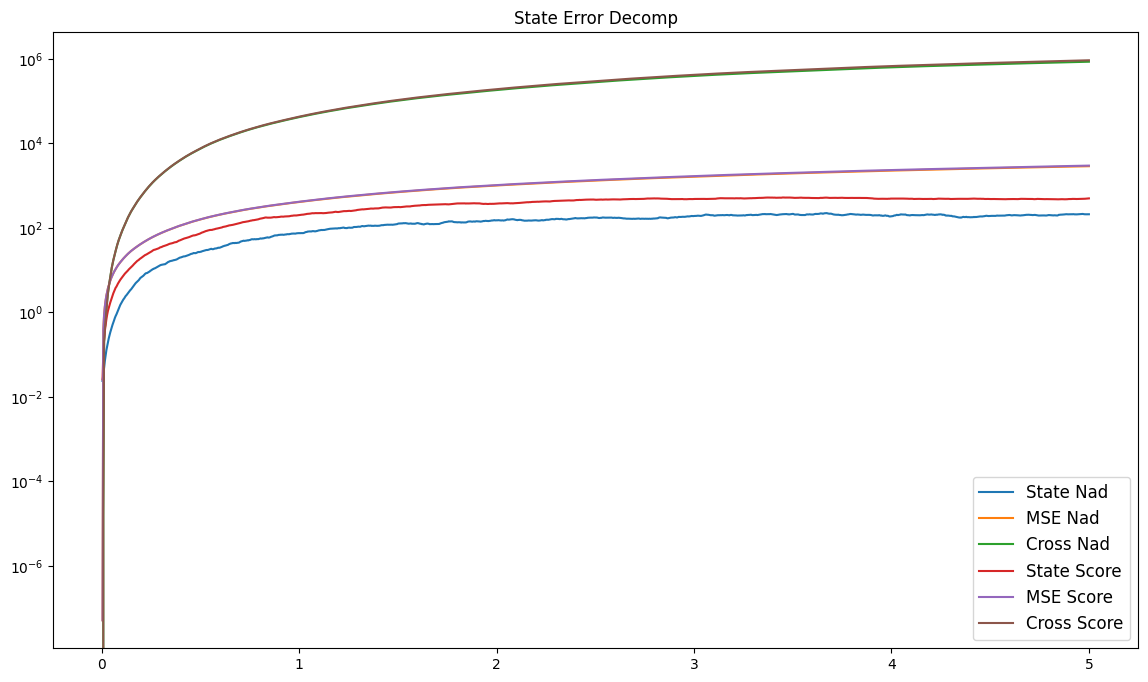

In [7]:
time_ax = np.linspace(0, 5, 1280+1)
fig, ax = plt.subplots(figsize=(14,8))
"""diffpaths =  ((hermite_paths-true_paths)*256)[:, 1:]
pointwise = np.cumsum((hermite_drifts - true_drifts)[:, :-1]**2,axis=-1)
exxtra = np.cumsum((hermite_drifts - true_drifts)[:,:-1], axis=-1)
cross = 2*np.cumsum(((hermite_drifts - true_drifts)[:,:-1])*np.concatenate(
    [np.zeros_like((hermite_drifts - true_drifts)[:, [0]]),  # S_{-1} = 0
     exxtra[:, :-1]],           # S_{k-1}
    axis=1
), axis=-1)
plt.plot(time_ax[1:], np.mean(diffpaths**2, axis=0),label="State Hermite")
plt.plot(time_ax[1:], np.mean(pointwise, axis=0), label="MSE Hermite")
plt.plot(time_ax[1:], np.mean(cross, axis=0), label="Cross Hermite")
diffpaths =  ((ridge_paths-true_paths)*256)[:, 1:]
pointwise = np.cumsum((ridge_drifts - true_drifts)[:, :-1]**2,axis=-1)
exxtra = np.cumsum((ridge_drifts - true_drifts)[:,:-1], axis=-1)
cross = 2*np.cumsum(((ridge_drifts - true_drifts)[:,:-1])*np.concatenate(
    [np.zeros_like((ridge_drifts - true_drifts)[:, [0]]),  # S_{-1} = 0
     exxtra[:, :-1]],           # S_{k-1}
    axis=1
), axis=-1)
plt.plot(time_ax[1:], np.mean(diffpaths**2, axis=0),label="State Ridge")
plt.plot(time_ax[1:], np.mean(pointwise, axis=0), label="MSE Ridge")
plt.plot(time_ax[1:], np.mean(cross, axis=0), label="Cross Ridge")
"""
diffpaths =  ((nad_paths-true_paths)*256)[:, 1:]
pointwise = np.cumsum((nad_paths - true_drifts)[:, :-1]**2,axis=-1)
exxtra = np.cumsum((nad_paths - true_drifts)[:,:-1], axis=-1)
cross = 2*np.cumsum(((nad_paths - true_drifts)[:,:-1])*np.concatenate(
    [np.zeros_like((nad_paths - true_drifts)[:, [0]]),  # S_{-1} = 0
     exxtra[:, :-1]],           # S_{k-1}
    axis=1
), axis=-1)
plt.plot(time_ax[1:], np.mean(diffpaths**2, axis=0),label="State Nad")
plt.plot(time_ax[1:], np.mean(pointwise, axis=0), label="MSE Nad")
plt.plot(time_ax[1:], np.mean(cross, axis=0), label="Cross Nad")
diffpaths =  ((score_paths-true_paths)*256)[:, 1:]
pointwise = np.cumsum((score_paths - true_drifts)[:, :-1]**2,axis=-1)
exxtra = np.cumsum((score_paths - true_drifts)[:,:-1], axis=-1)
cross = 2*np.cumsum(((score_paths - true_drifts)[:,:-1])*np.concatenate(
    [np.zeros_like((score_paths - true_drifts)[:, [0]]),  # S_{-1} = 0
     exxtra[:, :-1]],           # S_{k-1}
    axis=1
), axis=-1)
plt.plot(time_ax[1:], np.mean(diffpaths**2, axis=0),label="State Score")
plt.plot(time_ax[1:], np.mean(pointwise, axis=0), label="MSE Score")
plt.plot(time_ax[1:], np.mean(cross, axis=0), label="Cross Score")
plt.yscale("log")
plt.title("State Error Decomp")
plt.legend(fontsize=12)

In [ ]:
# Cloud plot of differences
hermite_state_diffs = true_paths - hermite_paths
hermite_drift_diffs = true_drifts - hermite_drifts

ridge_state_diffs = true_paths - ridge_paths
ridge_drift_diffs = true_drifts - ridge_drifts

nad_state_diffs = true_paths - nad_paths
nad_drift_diffs = true_drifts - nad_drifts

score_state_diffs = true_paths - score_paths
score_drift_diffs = true_drifts - score_drifts

In [ ]:
plt.plot(time_ax, np.mean(hermite_state_diffs**2, axis=0), label="Hermite")
plt.plot(time_ax, np.mean(ridge_state_diffs**2, axis=0), label="Ridge")
plt.plot(time_ax, np.mean(nad_state_diffs**2, axis=0), label="Nad")
plt.plot(time_ax, np.mean(score_state_diffs**2, axis=0), label="Score")

plt.legend()
plt.show()
plt.close()
plt.plot(time_ax, np.cumsum(np.mean(hermite_drift_diffs**2, axis=0)), label="Hermite")
plt.plot(time_ax, np.cumsum(np.mean(ridge_drift_diffs**2, axis=0)), label="Ridge")
plt.plot(time_ax, np.cumsum(np.mean(score_drift_diffs**2, axis=0)), label="Score")
plt.plot(time_ax, np.cumsum(np.mean(nad_drift_diffs**2, axis=0)), label="Nad")
plt.legend()
plt.show()
plt.close()
avg_acf = np.mean(np.atleast_2d([acf(hermite_drift_diffs[i,:], nlags=10) for i in range(hermite_drift_diffs.shape[0])]), axis=0)
print(np.any(avg_acf<0))
plt.plot(np.arange(1, 12), avg_acf, label="Hermite")
avg_acf = np.mean(np.atleast_2d([acf(ridge_drift_diffs[i,:], nlags=10) for i in range(ridge_drift_diffs.shape[0])]), axis=0)
print(np.any(avg_acf<0))
plt.plot(np.arange(1, 12), avg_acf, label="Ridge")
avg_acf = np.mean(np.atleast_2d([acf(nad_drift_diffs[i,:], nlags=10) for i in range(nad_drift_diffs.shape[0])]), axis=0)
print(np.any(avg_acf<0))
plt.plot(np.arange(1, 12), avg_acf, label="Nad")
avg_acf = np.mean(np.atleast_2d([acf(score_drift_diffs[i,:], nlags=10) for i in range(score_drift_diffs.shape[0])]), axis=0)
print(np.any(avg_acf<0))
plt.plot(np.arange(1, 12), avg_acf, label="Score")
plt.legend()
plt.show()
plt.close()

In [ ]:
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
hermite_eval=pd.read_parquet(root_dir + extra_path+ "_hermite_MSE.parquet")
ridge_eval=pd.read_parquet(root_dir + extra_path+ "_ridge_MSE.parquet")

nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
hermite_eval_true_law=pd.read_parquet(root_dir + extra_path+"_hermite_true_law_MSE.parquet")
ridge_eval_true_law=pd.read_parquet(root_dir + extra_path+"_ridge_true_law_MSE.parquet")

score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
hermite_state_eval=pd.read_parquet(root_dir + extra_path+ "_hermite_state_MSE.parquet")
ridge_state_eval=pd.read_parquet(root_dir + extra_path+ "_ridge_state_MSE.parquet")


nad_unif =pd.read_parquet(root_dir + extra_path+ "_nad_uniform_MSE.parquet", engine="fastparquet")
score_unif =pd.read_parquet(root_dir + extra_path+ "_score_uniform_MSE.parquet", engine="fastparquet")
ridge_unif =pd.read_parquet(root_dir + extra_path+ "_ridge_uniform_MSE.parquet", engine="fastparquet")
hermite_unif =pd.read_parquet(root_dir + extra_path+ "_hermite_uniform_MSE.parquet", engine="fastparquet")



score_eval_std=pd.read_parquet(root_dir + extra_path+ "_score_MSE_STD.parquet", engine="fastparquet")
nad_eval_std=pd.read_parquet(root_dir + extra_path+ "_nad_MSE_STD.parquet")
hermite_eval_std=pd.read_parquet(root_dir + extra_path+ "_hermite_MSE_STD.parquet")
ridge_eval_std=pd.read_parquet(root_dir + extra_path+ "_ridge_MSE_STD.parquet")

nad_eval_true_law_std=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE_STD.parquet")
score_eval_true_law_std=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE_STD.parquet")
hermite_eval_true_law_std=pd.read_parquet(root_dir + extra_path+"_hermite_true_law_MSE_STD.parquet")
ridge_eval_true_law_std=pd.read_parquet(root_dir + extra_path+"_ridge_true_law_MSE_STD.parquet")

score_state_eval_std=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE_STD.parquet")
nad_state_eval_std=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE_STD.parquet")
hermite_state_eval_std=pd.read_parquet(root_dir + extra_path+ "_hermite_state_MSE_STD.parquet")
ridge_state_eval_std=pd.read_parquet(root_dir + extra_path+ "_ridge_state_MSE_STD.parquet")


time_ax = np.linspace(0, 1., 257)
assert np.allclose(time_ax, np.concatenate([[0.], np.linspace(1/256, 1., 256)]))
quadsin_state_eval = (pd.concat([score_state_eval.rename({d:d+"Score State" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+"Nadaraya State" for d in nad_state_eval.columns}, axis=1), ridge_state_eval.rename({d:d+"Ridge State" for d in ridge_state_eval.columns}, axis=1), hermite_state_eval.rename({d:d+"Hermite State" for d in hermite_state_eval.columns}, axis=1)], axis=1)).iloc[:257,:]

quadsin_state_eval_std = (pd.concat([score_state_eval_std.rename({d:d+"Score State" for d in score_state_eval_std.columns}, axis=1),nad_state_eval_std.rename({d:d+"Nadaraya State" for d in nad_state_eval_std.columns}, axis=1), ridge_state_eval_std.rename({d:d+"Ridge State" for d in nad_state_eval_std.columns}, axis=1), hermite_state_eval_std.rename({d:d+"Hermite State" for d in hermite_state_eval_std.columns}, axis=1)], axis=1)).iloc[:257,:]

quadsin_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+"Score True" for d in score_eval_true_law.columns}, axis=1),nad_eval_true_law.rename({d:d+"Nadaraya True" for d in nad_eval_true_law.columns}, axis=1), ridge_eval_true_law.rename({d:d+"Ridge True" for d in ridge_eval_true_law.columns}, axis=1), hermite_eval_true_law.rename({d:d+"Hermite True" for d in hermite_eval_true_law.columns}, axis=1)], axis=1)).iloc[:257,:]

quadsin_true_law_eval_std = (pd.concat([score_eval_true_law_std.rename({d:d+"Score True" for d in score_eval_true_law_std.columns}, axis=1),nad_eval_true_law_std.rename({d:d+"Nadaraya True" for d in nad_eval_true_law_std.columns}, axis=1), ridge_eval_true_law_std.rename({d:d+"Ridge True" for d in ridge_eval_true_law_std.columns}, axis=1), hermite_eval_true_law_std.rename({d:d+"Hermite True" for d in hermite_eval_true_law_std.columns}, axis=1)], axis=1)).iloc[:257,:]


quadsin_alt_law_eval = (pd.concat([score_eval.rename({d:d+"Score" for d in score_eval.columns}, axis=1),nad_eval.rename({d:d+"Nadaraya" for d in nad_eval.columns}, axis=1), ridge_eval.rename({d:d+"Ridge" for d in ridge_eval.columns}, axis=1), hermite_eval.rename({d:d+"Hermite" for d in hermite_eval.columns}, axis=1)], axis=1)).iloc[:257,:]

quadsin_alt_law_eval_std = (pd.concat([score_eval_std.rename({d:d+"Score" for d in score_eval_std.columns}, axis=1),nad_eval_std.rename({d:d+"Nadaraya" for d in nad_eval_std.columns}, axis=1), ridge_eval_std.rename({d:d+"Ridge" for d in ridge_eval_std.columns}, axis=1), hermite_eval_std.rename({d:d+"Hermite" for d in hermite_eval_std.columns}, axis=1)], axis=1)).iloc[:257,:]

quadsin_uniform = (pd.concat([score_unif.rename({d:d+"Score" for d in score_unif.columns}, axis=1),nad_unif.rename({d:d+"Nadaraya" for d in nad_unif.columns}, axis=1),ridge_unif.rename({d:d+"Ridge" for d in ridge_unif.columns}, axis=1),hermite_unif.rename({d:d+"Hermite" for d in hermite_unif.columns}, axis=1)], axis=1))
quadsin_uniform.columns = quadsin_uniform.columns.map(lambda x: x.replace("mse", ""))

In [ ]:
true_law_eval = quadsin_true_law_eval.sort_index(axis=1).set_index(time_ax)
true_law_eval_std = quadsin_true_law_eval_std.sort_index(axis=1).set_index(time_ax)

In [ ]:
alt_law_eval = quadsin_alt_law_eval.sort_index(axis=1).set_index(time_ax)
alt_law_eval_std = quadsin_alt_law_eval.sort_index(axis=1).set_index(time_ax)

In [ ]:
state_eval = quadsin_state_eval.sort_index(axis=1).set_index(time_ax)
state_eval_std = quadsin_state_eval_std.sort_index(axis=1).set_index(time_ax)

In [ ]:
uniform = quadsin_uniform
def fill_stds(currevals, ax, currstds):
    for col, line in zip(currevals.columns, ax.get_lines()):
        x = currevals.index.values
        m = currevals[col].astype(float).to_numpy()
        s = currstds[col].astype(float).to_numpy()

        low, high = m - s, m + s
        y1, y2 = np.minimum(low, high), np.maximum(low, high)

        pos = np.isfinite(y2) & (y2 > 0)
        if not np.any(pos):
            print("hi")
            continue
        floor = max(1e-12, np.nanmin(m[pos]) * 1e-6)  # small positive floor
        y1 = np.clip(y1, floor, None)
        y2 = np.clip(y2, floor, None)

        ax.fill_between(x, y1, y2, where=pos, interpolate=True,
                        color=line.get_color(), alpha=0.2, linewidth=0, label="_nolegend_")


In [ ]:
import matplotlib.pyplot as plt
for k in range(0, true_law_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = true_law_eval.iloc[:, k:k+4]
    currstds = true_law_eval_std.iloc[:, k:k+4]
    currevals=currevals.rename({d:d.replace("True", "").replace("Nadaraya", " Nadaraya").replace("Ridge", " Ridge").replace("Hermite", " Hermite").replace("Score", " Score") for d in currevals.columns}, axis=1)
    currstds=currstds.rename({d:d.replace("True", "").replace("Nadaraya", " Nadaraya").replace("Ridge", " Ridge").replace("Hermite", " Hermite").replace("Score", " Score") for d in currstds.columns}, axis=1)
    label = currevals.columns[0].split(" Hermite")[0]
    if label in "BiPot":
        titlab = "$\mu_3$"
    elif label in "QuadSinHF":
        titlab = "$\mu_2$"
    else:
        titlab = "$\mu_1$"
    currevals = currevals.rename({d: d.split(f"{label}")[-1]for d in currevals.columns}, axis=1)
    currstds = currstds.rename({d: d.split(f"{label}")[-1]for d in currstds.columns}, axis=1)
    currevals.plot(ax=ax, linewidth=4)
    #fill_stds(currevals, ax, currstds)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    plt.title(rf"$E^{{(\mu)}}_j$ for {titlab}", fontsize=50)
    plt.ylabel(rf"$E^{{(\mu)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.yscale("log")
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
import matplotlib.pyplot as plt
for k in range(0, alt_law_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = alt_law_eval.iloc[:, k:k+4]
    currstds = alt_law_eval_std.iloc[:, k:k+4]
    currevals=currevals.rename({d:d.replace("True", "").replace("Nadaraya", " Nadaraya").replace("Ridge", " Ridge").replace("Hermite", " Hermite").replace("Score", " Score") for d in currevals.columns}, axis=1)
    currstds=currstds.rename({d:d.replace("True", "").replace("Nadaraya", " Nadaraya").replace("Ridge", " Ridge").replace("Hermite", " Hermite").replace("Score", " Score") for d in currstds.columns}, axis=1)
    label = currevals.columns[0].split(" Hermite")[0]
    if label in "BiPot":
        titlab = "$\mu_3$"
    elif label in "QuadSinHF":
        titlab = "$\mu_2$"
    else:
        titlab = "$\mu_1$"
    currevals = currevals.rename({d: d.split(f"{label}")[-1]for d in currevals.columns}, axis=1)*(1/256)**2
    currstds = currstds.rename({d: d.split(f"{label}")[-1]for d in currstds.columns}, axis=1)
    currevals.plot(ax=ax, linewidth=4)
    #fill_stds(currevals, ax, currstds)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    plt.title(rf"$\widetilde{{E}}^{{(\mu)}}_j$ for {titlab}", fontsize=50)
    plt.ylabel(rf"$\widetilde{{E}}^{{(\mu)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.yscale("log")
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
import matplotlib.pyplot as plt
for k in range(0, state_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = state_eval.iloc[:, k:k+4]
    currstds = state_eval_std.iloc[:, k:k+4]
    currevals=currevals.rename({d:d.replace("State", "").replace("Nadaraya", " Nadaraya").replace("Ridge", " Ridge").replace("Hermite", " Hermite").replace("Score", " Score") for d in currevals.columns}, axis=1)
    currstds=currstds.rename({d:d.replace("State", "").replace("Nadaraya", " Nadaraya").replace("Ridge", " Ridge").replace("Hermite", " Hermite").replace("Score", " Score") for d in currstds.columns}, axis=1)
    label = currevals.columns[0].split(" Hermite")[0]
    if label in "BiPot":
        titlab = "$\mu_3$"
    elif label in "QuadSinHF":
        titlab = "$\mu_2$"
    else:
        titlab = "$\mu_1$"
    currevals = currevals.rename({d: d.split(f"{label}")[-1]for d in currevals.columns}, axis=1)
    currstds = currstds.rename({d: d.split(f"{label}")[-1]for d in currstds.columns}, axis=1)
    currevals.plot(ax=ax, linewidth=4)
    #fill_stds(currevals, ax, currstds)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    plt.title(rf"$E^{{(Y)}}_j$ for {titlab}", fontsize=50)
    plt.ylabel(rf"$E^{{(Y)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.yscale("log")
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
valsign = {"SinLog":1, "QuadSinHF":2, "BiPot":3}
def mapping(y):
    if "Nadaraya" in y:
        return "Nadaraya"
    elif "Score" in y:
        return "Score"
    elif "Hermite" in y:
        return "Hermite"
    return "Ridge"

In [ ]:
s=(true_law_eval.iloc[[-1],:].T.assign(M =lambda x: x.index.map(lambda y: y.replace("Nadaraya", "").replace("Hermite", "").replace("Ridge", "").replace("Score", "").replace(" True", ""))).assign(D= lambda x: x.index.map(lambda y: mapping(y))).assign(V=lambda x: x.M.map(lambda y: valsign[y])).sort_values("V").set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("M")).iloc[:, 0].unstack(level=-1).iloc[::-1, :]*100).round(3)
s

In [ ]:
s=(alt_law_eval.iloc[[-1],:].T.assign(M =lambda x: x.index.map(lambda y: y.replace("Nadaraya", "").replace("Hermite", "").replace("Ridge", "").replace("Score", "").replace(" True", ""))).assign(D= lambda x: x.index.map(lambda y: mapping(y))).assign(V=lambda x: x.M.map(lambda y: valsign[y])).sort_values("V").set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("M")).iloc[:, 0].unstack(level=-1).iloc[::-1, :]*100).round(3)
s

In [ ]:
s=state_eval.iloc[[-1],:].T.assign(M =lambda x: x.index.map(lambda y: y.replace("Nadaraya", "").replace("Hermite", "").replace("Ridge", "").replace("Score", "").replace(" State", ""))).assign(D= lambda x: x.index.map(lambda y: mapping(y))).assign(V=lambda x: x.M.map(lambda y: valsign[y])).sort_values("V").set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("M")).iloc[:, 0].unstack(level=-1).iloc[::-1, :]*1000
s.round(3)

In [ ]:
uniform